# Example of using nonlinear_models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from fdi_flow.models import nonlinear_models
from fdi_flow.models import utils

## Continuous model

In [2]:
# Controlled pendulum

def f(x, u, t):
    theta, omega = x
    torque = u[0]
    g = 9.81
    l = 1.0
    m = 1.0
    dtheta = omega
    domega = (-g / l) * np.sin(theta) + torque / (m * l**2)
    return [dtheta, domega]

def g(x, u, t):
    return [x[0], x[1]]  

model = nonlinear_models.NonlinearStateSpaceModel(f, g)

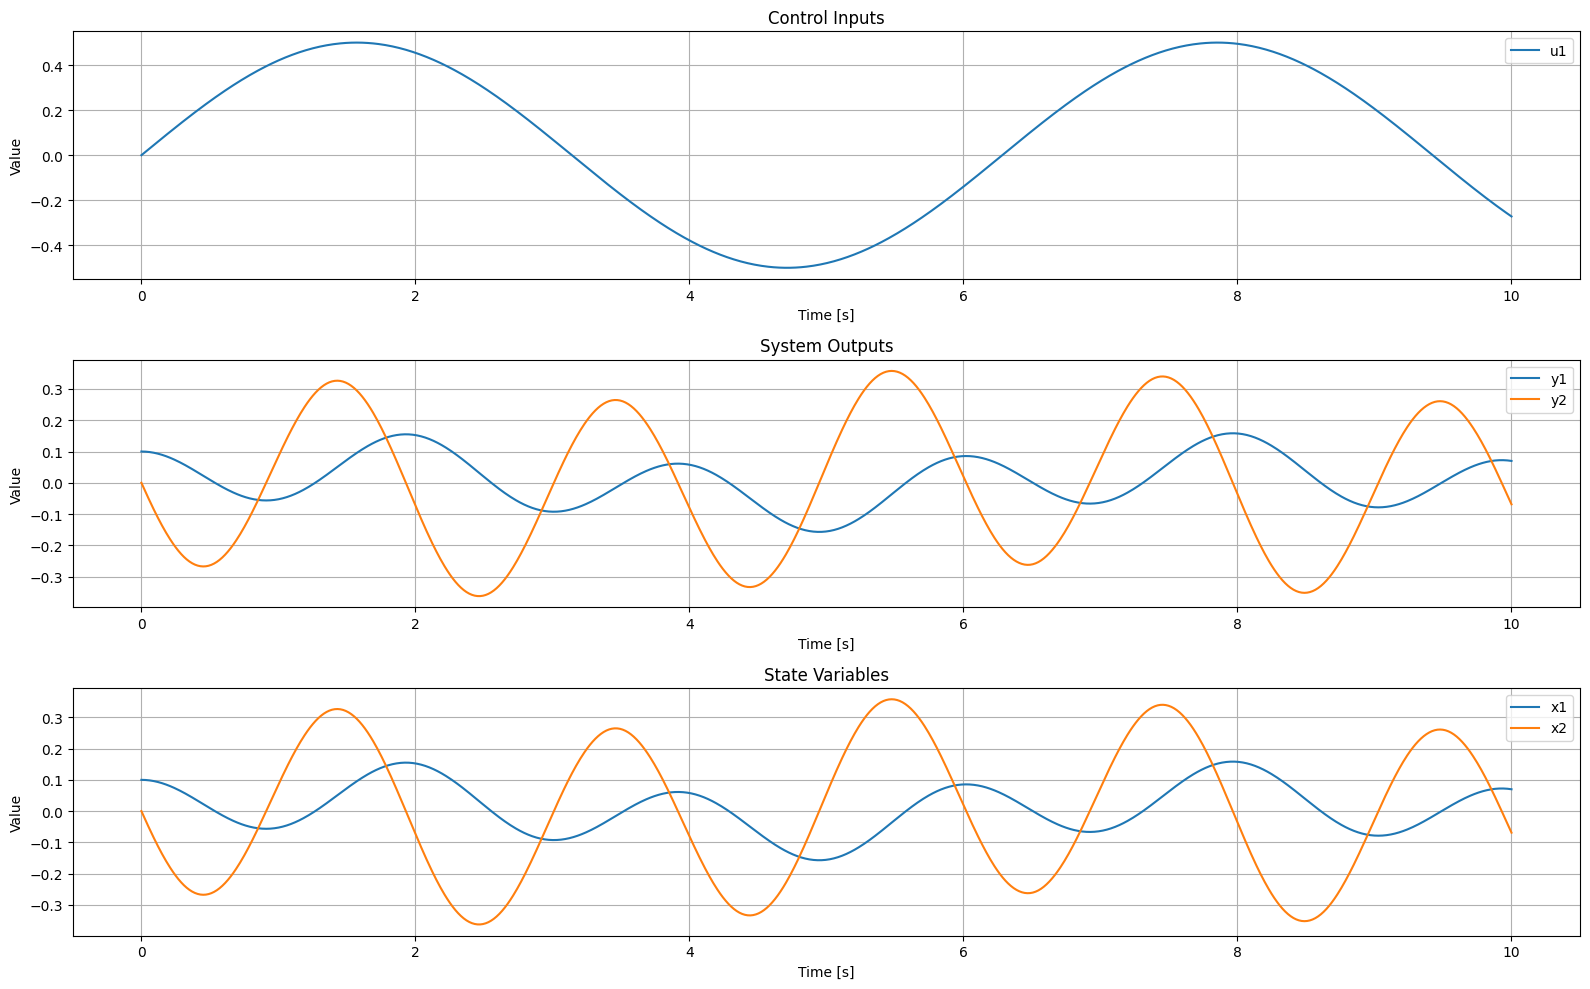

In [3]:
t_final = 10
dt = 0.01
time = np.linspace(0, t_final, int(t_final / dt))
u = np.column_stack([0.5 * np.sin(time)])  
x0 = [0.1, 0.0]  

result = model.simulate(u=u, x0=x0, t_final=t_final, dt=dt, method='RK45')
utils.plot_simulation_results(result)

## Discrete model

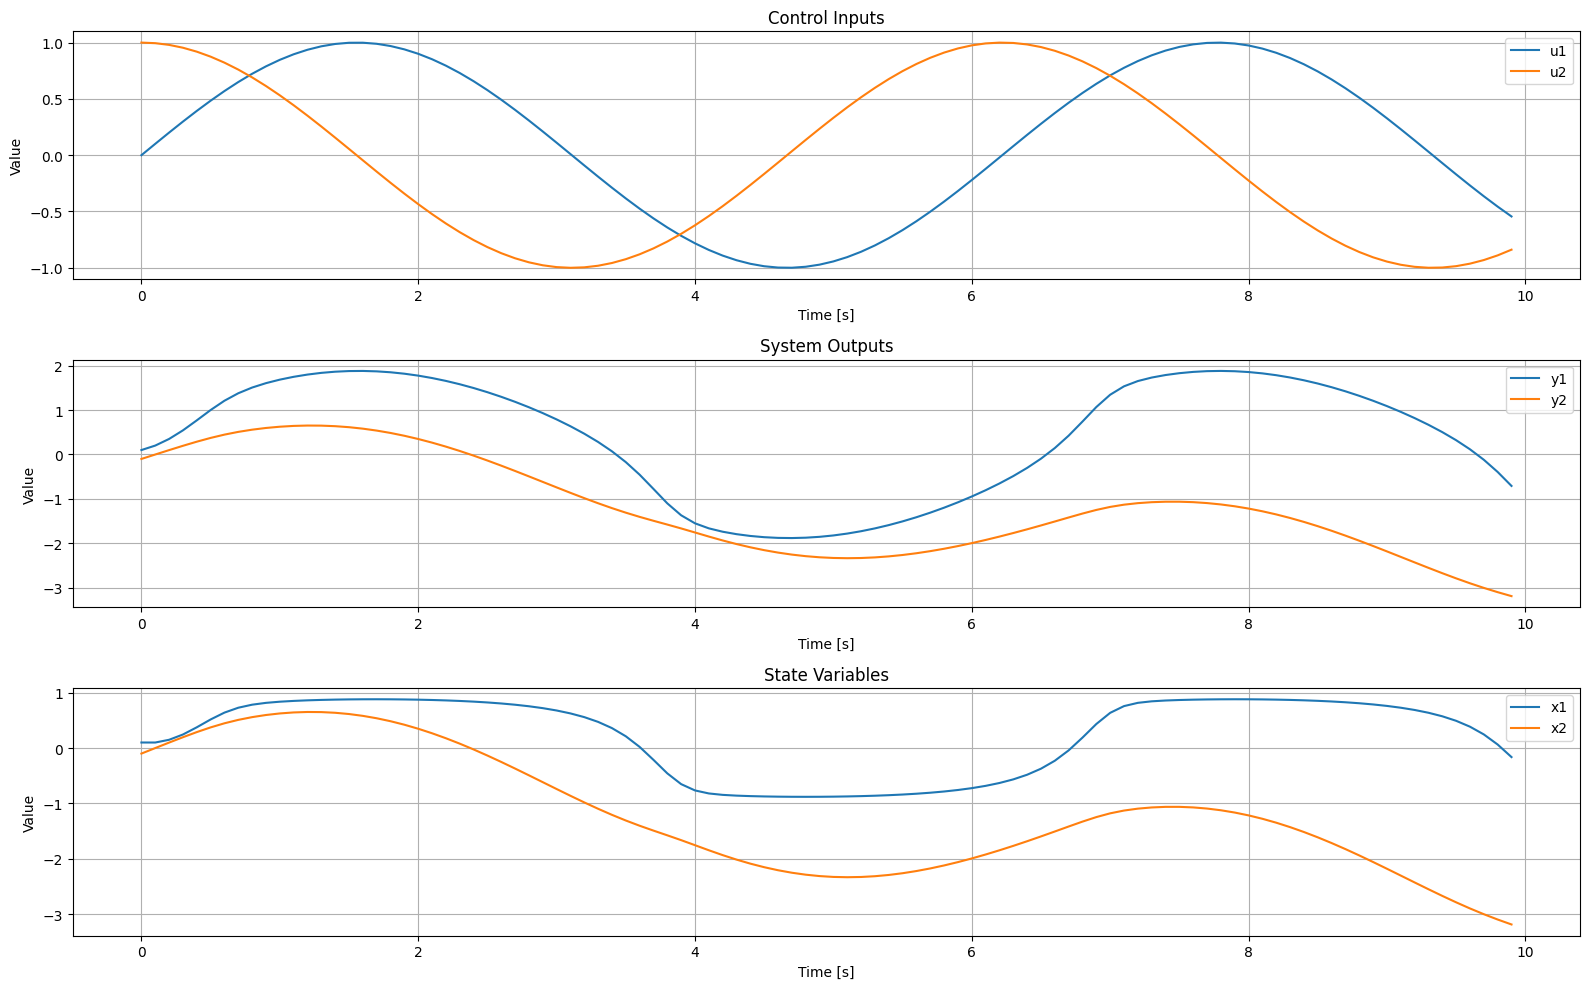

In [5]:
def f(x, u, k):
    return np.array([
        np.tanh(x[0] + 0.5 * u[0]),
        x[1] + 0.1 * u[1] - 0.05 * x[0]**2
    ])

def g(x, u, k):
    return np.array([
        x[0] + u[0],
        x[1]
    ])

model = nonlinear_models.NonlinearDiscreteStateSpaceModel(f, g)

steps = 100
u = np.column_stack([
    np.sin(np.linspace(0, 10, steps)),
    np.cos(np.linspace(0, 10, steps))
])
x0 = np.array([0.1, -0.1])

result = model.simulate(u=u, x0=x0, dt=0.1)
utils.plot_simulation_results(result)